In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plts

In [62]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [63]:
df = pd.read_csv('oil-price-train.csv')

In [64]:
df.head()

,Date,Price
0,05/15/1987,18.58
1,06/15/1987,18.86
2,07/15/1987,19.86
3,08/15/1987,18.98
4,09/15/1987,18.31


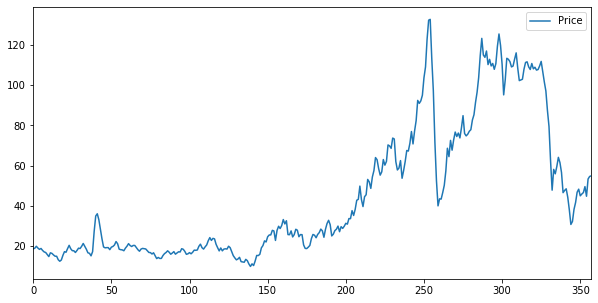

In [65]:
df.plot(figsize = (10, 5))

In [66]:
from keras.models import Sequential

In [67]:
from keras.layers import Dense, Dropout, LSTM

In [68]:
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Price'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Price'][i] = data['Price'][i]

In [69]:
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

In [70]:
dataset = new_data.values

In [72]:
train = dataset

In [73]:
dataset = dataset.astype(float)

In [74]:
scaled_data = scaler.fit_transform(dataset)

In [99]:
x_train, y_train = [], []
for i in range(10,len(train)):
    x_train.append(scaled_data[i-10:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [100]:
model = Sequential()

In [101]:
model.add(LSTM(units=20, return_sequences=True, input_shape=(x_train.shape[1],1)))

In [102]:
model.add(LSTM(units=30))

In [103]:
model.add(Dense(1))

In [104]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [105]:
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

Epoch 1/1
 - 4s - loss: 0.0182


In [106]:
nwdf = pd.read_csv('oil-price-test.csv')

In [107]:
nwdf.index = nwdf.Date
nwdf.drop('Date', axis=1, inplace=True)

In [108]:
inputs = nwdf.values

In [109]:
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

In [110]:
X_test = []
for i in range(10,inputs.shape[0]):
    X_test.append(inputs[i-10:i,0])
X_test = np.array(X_test)

In [113]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
predicted_oil_price = model.predict(X_test)
predicted_oil_price = scaler.inverse_transform(predicted_oil_price)

In [123]:
tst = nwdf[10:]
ptst = nwdf[10:]

In [124]:
len(predicted_oil_price)

25

In [125]:
len(ptst)

25

In [129]:
#ptst has predicted prices
ptst.loc[:, 'Price'] = predicted_oil_price

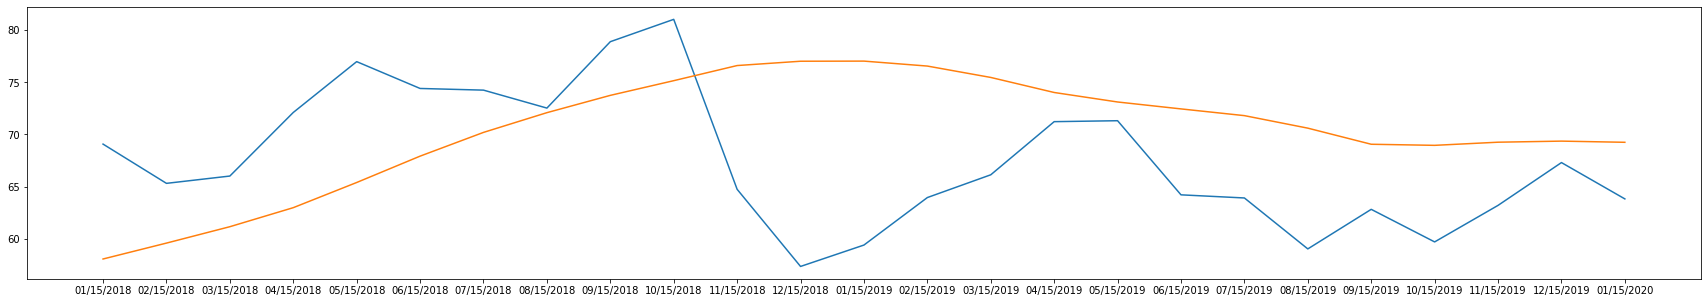

In [134]:
plts.figure(figsize=(30,5))
plts.plot(tst['Price'])
plts.plot(ptst['Price'])

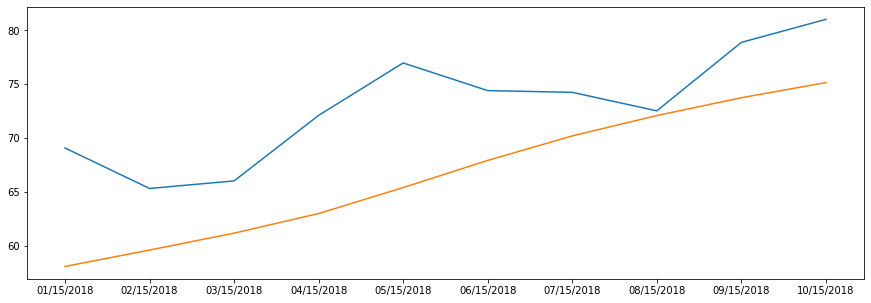

In [149]:
plts.figure(figsize=(15,5))
plts.plot(tst['Price'][0:10])
plts.plot(ptst['Price'][0:10])

In [151]:
import matplotlib.pylab as pltss
%pylab inline

Populating the interactive namespace from numpy and matplotlib


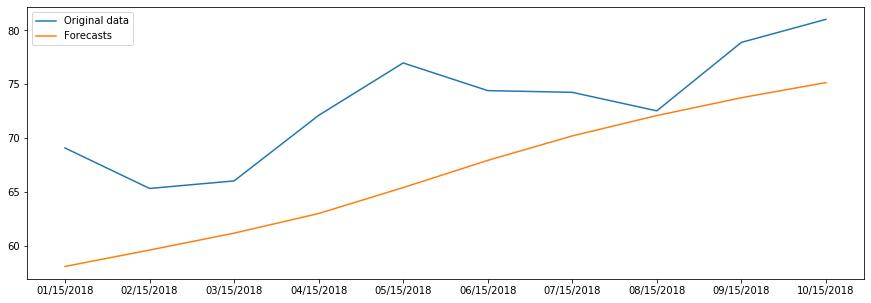

In [152]:
fig, ax = pltss.subplots(nrows=1, ncols=1, figsize=[15,5])

orig, = plot(tst[0:10], label="Original data")
pred, = plot(ptst[0:10], label="Forecasts")

legend(handles=[orig, pred])